# Exploratory Data Analysis on Global Terrorism

## Prerna Shekhawat: Data Science intern at LetsGrowMore(VIP) September 2023

**Task**:

- In this dataset, we will be exploring the terror attacks over the world from 1970-2016, finding the most affected countries, the most notorious groups, their motives,etc.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches
plt.style.use('fivethirtyeight')
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib import animation, rc
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
terror = pd.read_csv('/content/globalterrorism.csv.csv', encoding='ISO-8859-1')
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970.0,1.0,0.0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [3]:
# shape of the data
terror.shape

(29975, 135)

In [4]:
# Renaming the columns
terror.rename(columns={'eventid':'Event_Id','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [5]:
terror.head()

,Event_Id,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970.0,1.0,0.0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [6]:
# extracting important columns
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970.0,7.0,2.0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970.0,0.0,0.0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970.0,1.0,0.0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [7]:
terror.shape

(29975, 18)

In [8]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29975 entries, 0 to 29974
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         29974 non-null  float64
 1   Month        29974 non-null  float64
 2   Day          29974 non-null  float64
 3   Country      29974 non-null  object 
 4   Region       29974 non-null  object 
 5   city         29974 non-null  object 
 6   latitude     28397 non-null  float64
 7   longitude    28397 non-null  float64
 8   AttackType   29974 non-null  object 
 9   Killed       24447 non-null  float64
 10  Wounded      22698 non-null  float64
 11  Target       29616 non-null  object 
 12  Summary      1092 non-null   object 
 13  Group        29974 non-null  object 
 14  Target_type  29974 non-null  object 
 15  Weapon_type  29974 non-null  object 
 16  Motive       821 non-null    object 
 17  casualities  22559 non-null  float64
dtypes: float64(8), object(10)
memory usage: 4.1+ M

In [9]:
# Saving data for Tableau
terror.to_csv('terror.csv')

In [10]:
terror.isnull().sum()

Year               1
Month              1
Day                1
Country            1
Region             1
city               1
latitude        1578
longitude       1578
AttackType         1
Killed          5528
Wounded         7277
Target           359
Summary        28883
Group              1
Target_type        1
Weapon_type        1
Motive         29154
casualities     7416
dtype: int64

## Some basic Analysis

In [11]:
print("Country with highest terrorist attacks: ", terror['Country'].value_counts().index[0])
print("\nRegion with highest terrorist attacks: ",terror['Region'].value_counts().index[0])
print('\nMaximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with highest terrorist attacks:  El Salvador

Region with highest terrorist attacks:  Western Europe

Maximum people killed in an attack are: 422.0 that took place in Iran


### Number of terrorist activities each year.

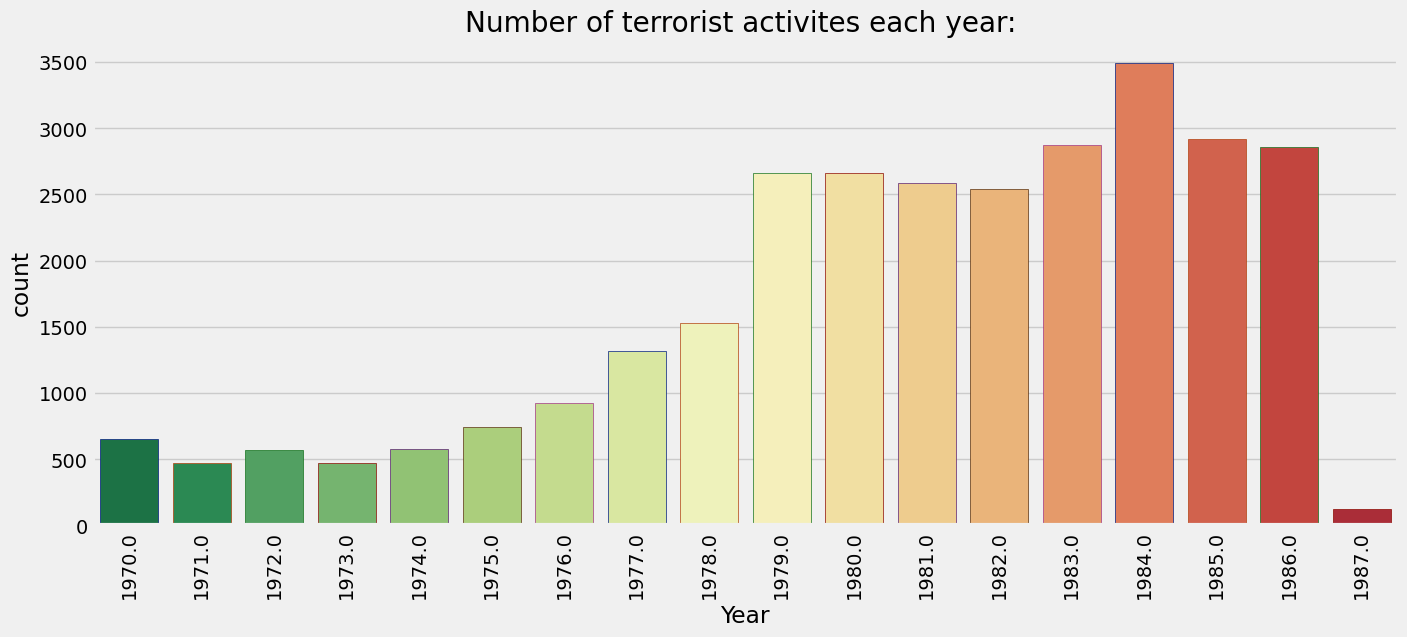

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year', data=terror, palette='RdYlGn_r', edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title("Number of terrorist activites each year: ")
plt.show()

**Clearly the number of terrorist activities have gone up sharply after 2000.**

### Attacking Methods by Terrorists

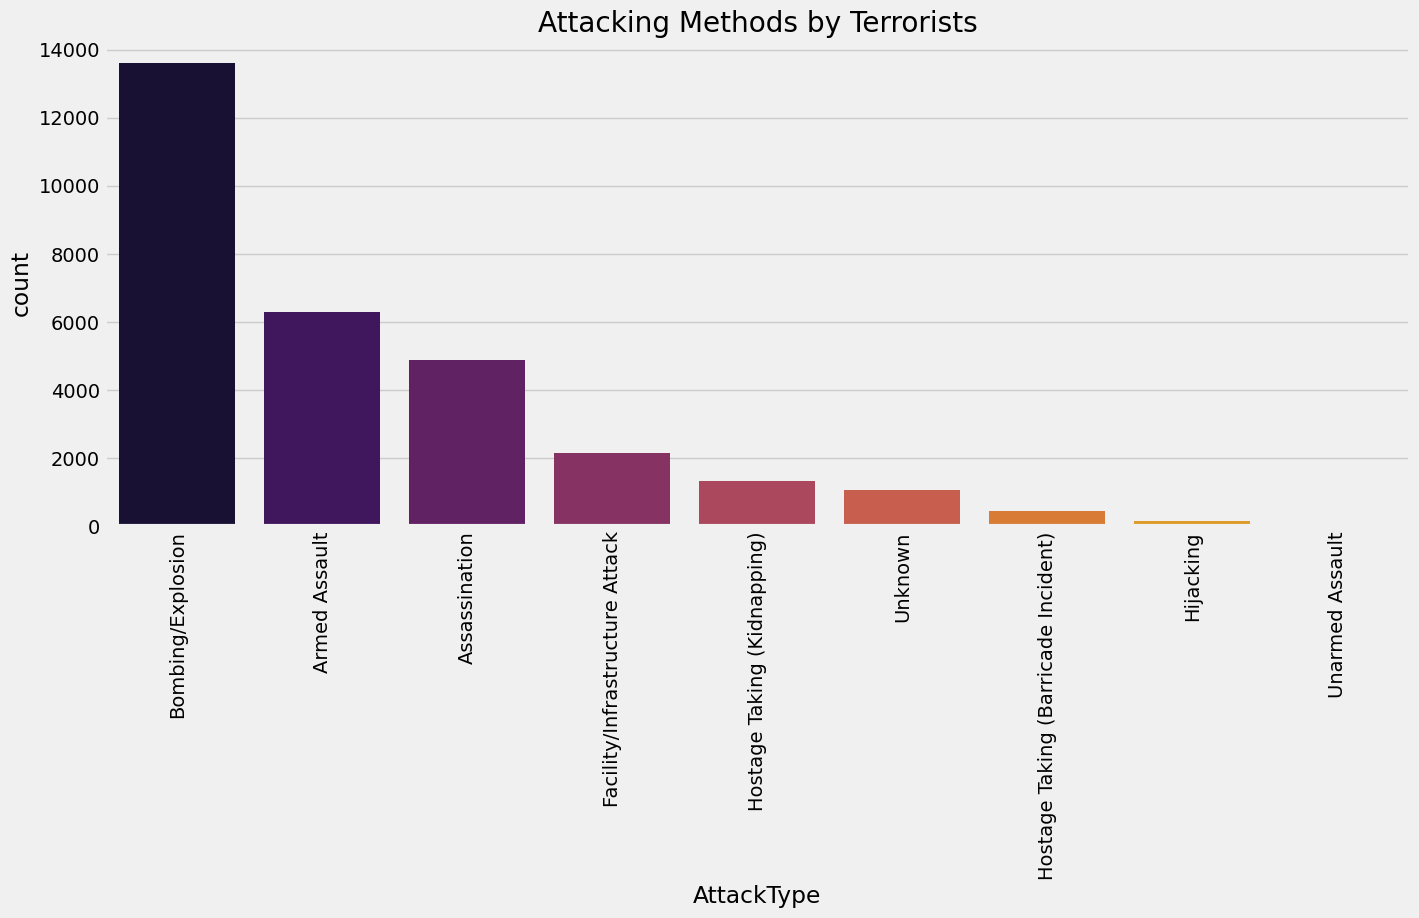

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot(x='AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

### Favourites Targets

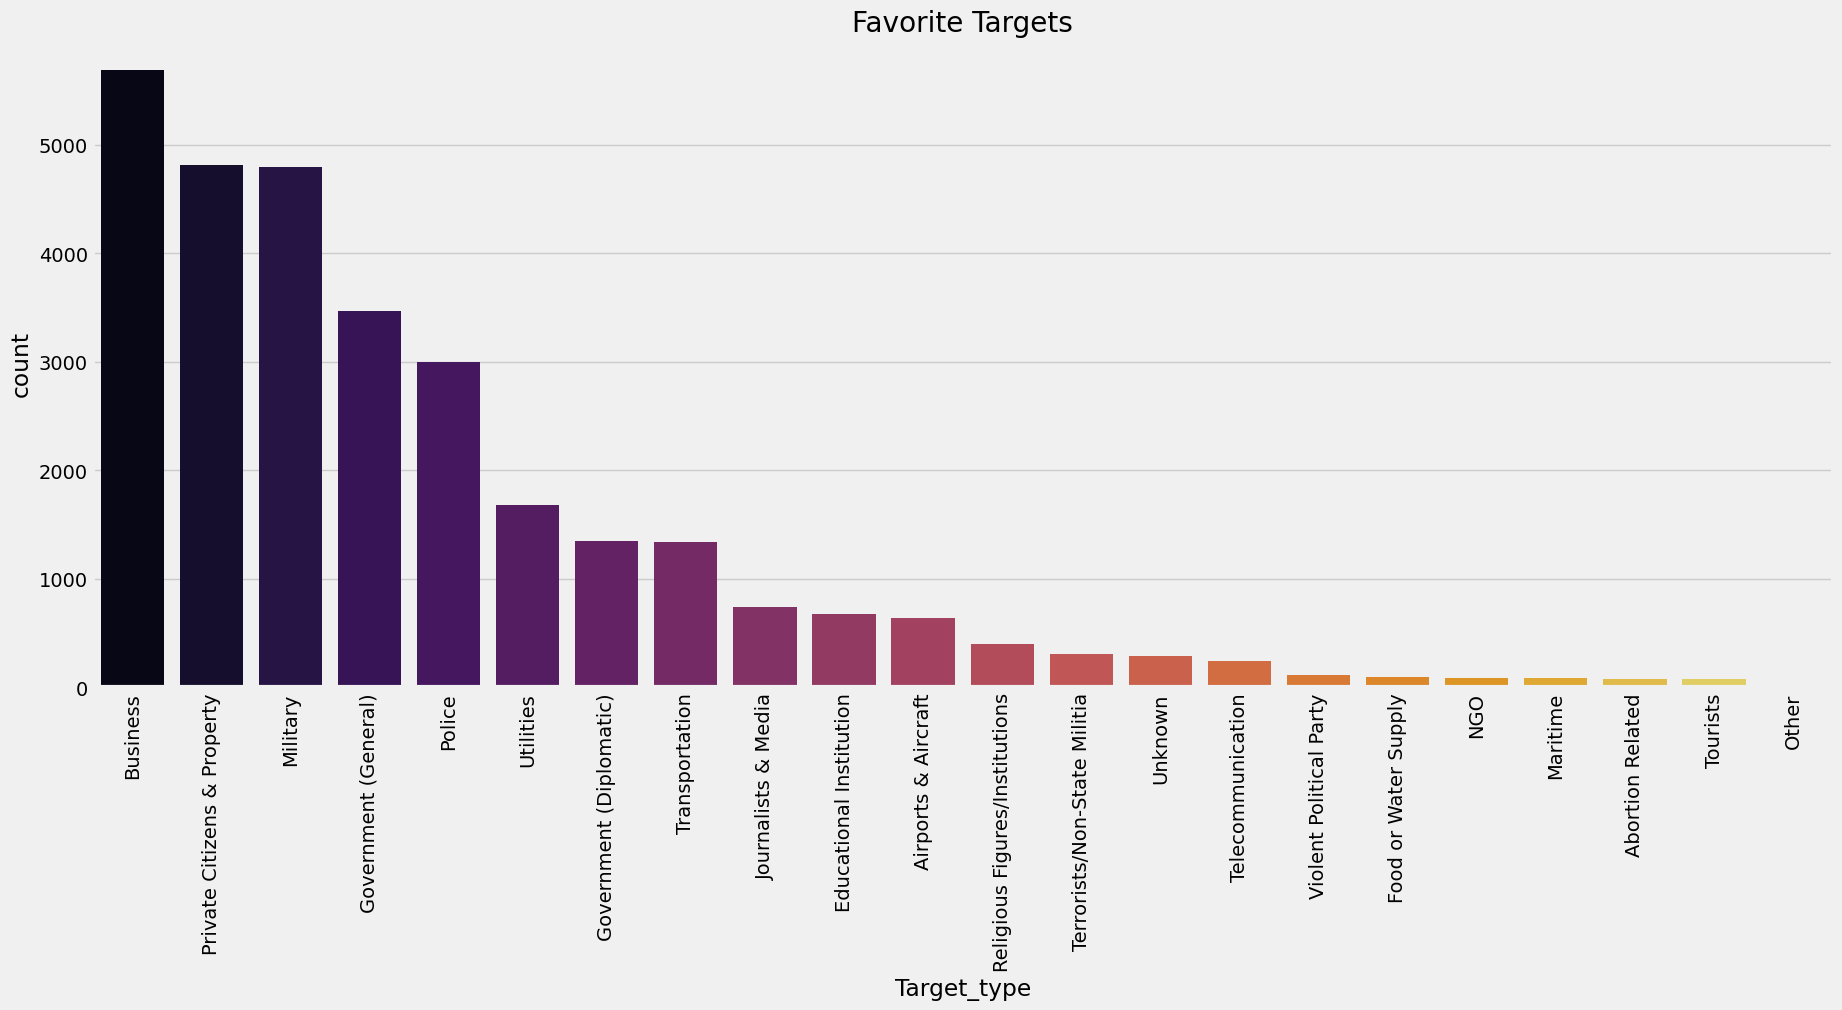

In [19]:
order = terror['Target_type'].value_counts().index
plt.subplots(figsize=(20,8))
sns.countplot(x='Target_type', data=terror, palette='inferno', order=order)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

### Number of Terrorist Activities by Region

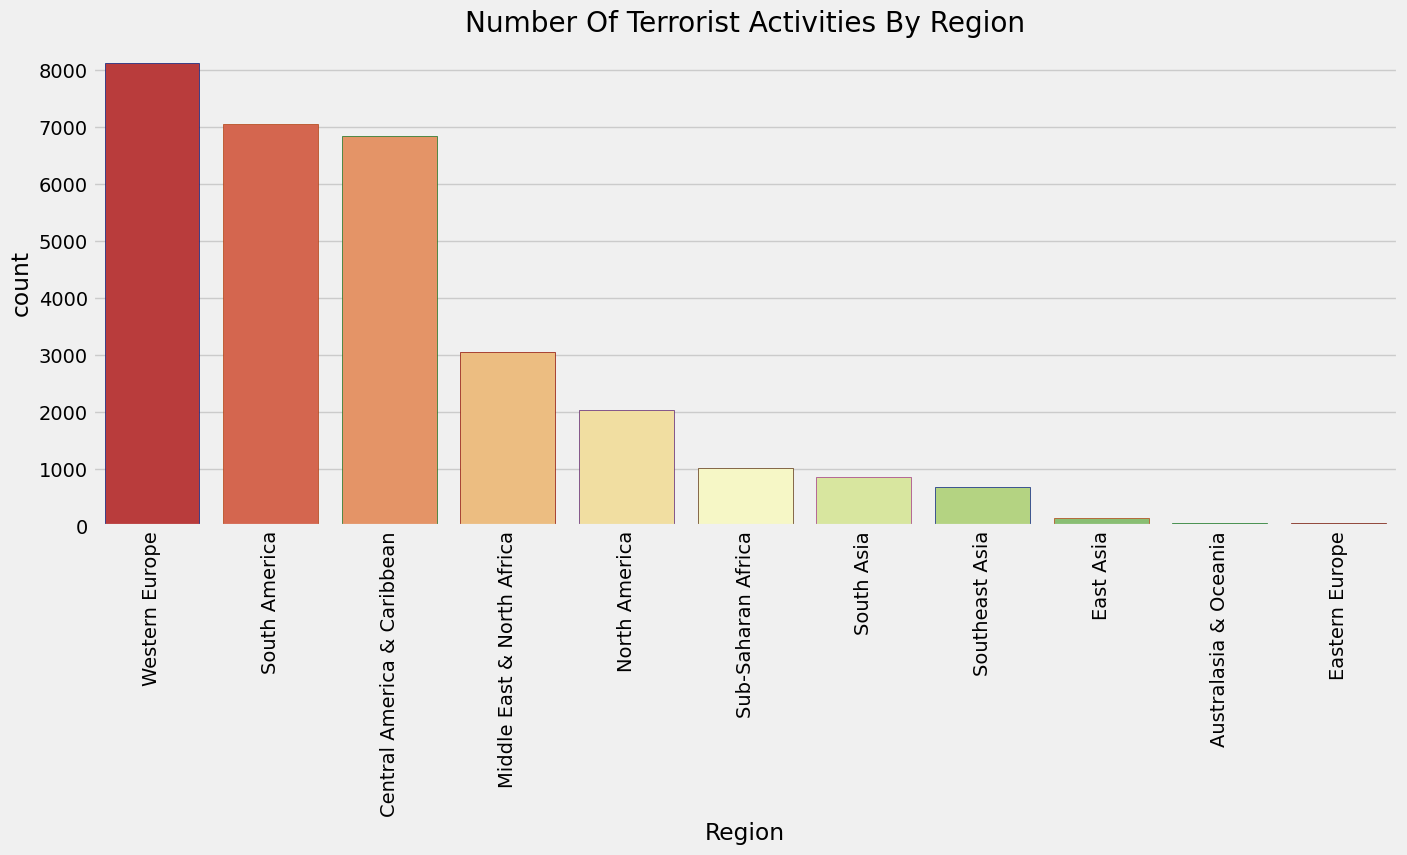

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Region',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

**We can see some results by above graphs.**

1. **Bombing and Explosion** is the highest happened attacking method while Terrorist Attacks.
2. **Private Citizens & Property** is the most favourite target by Terrorists.

3. **Middle East and North Africa** are the most terrorism prone regions followed by **South Asia**. The **Australian Region** have experienced very few terrorist events. Collectively we can say that The African and Asian Continent experience the highest terrorist attacks. But why are these regions prone to terrorism? Does this have any relation to the mindset of the people? or any other reason??

### Trend in Terrorist Activity

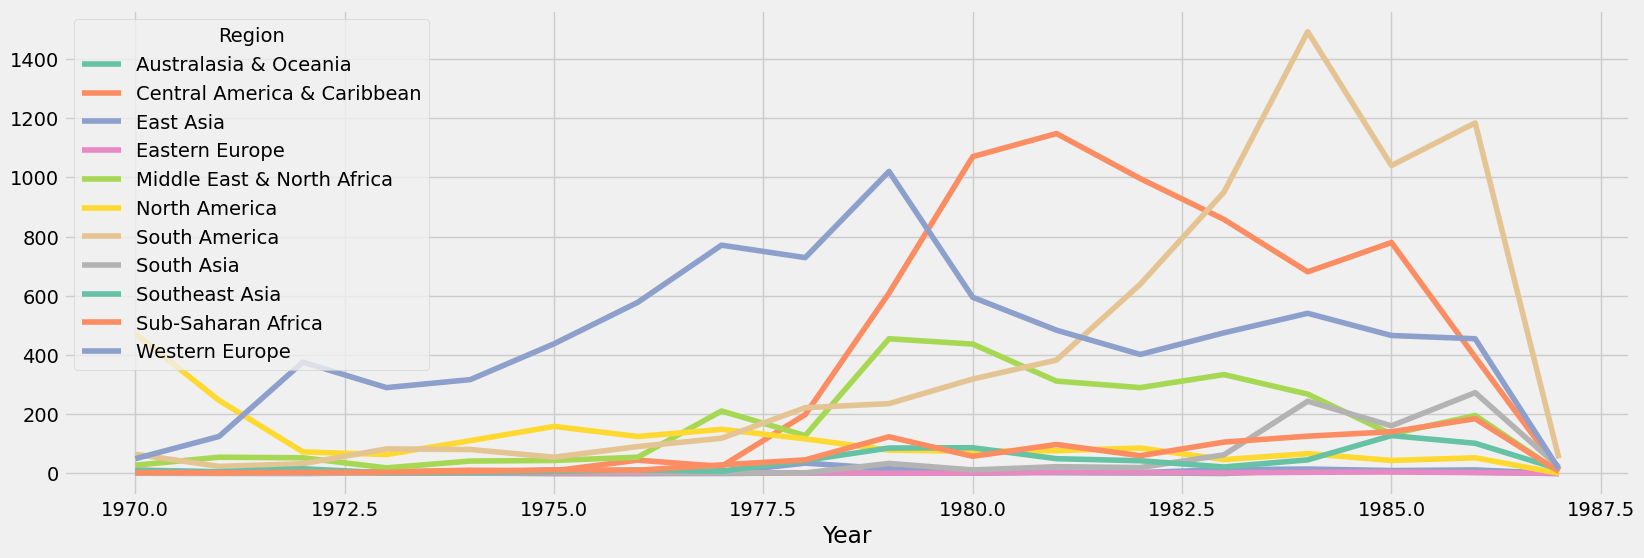

In [22]:
terror_region = pd.crosstab(terror.Year, terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.show()

As seen already, Middle-East,North Africa,South Asia have seen a shoot in the number of terrorist activities over the years

### AttackType vs Region

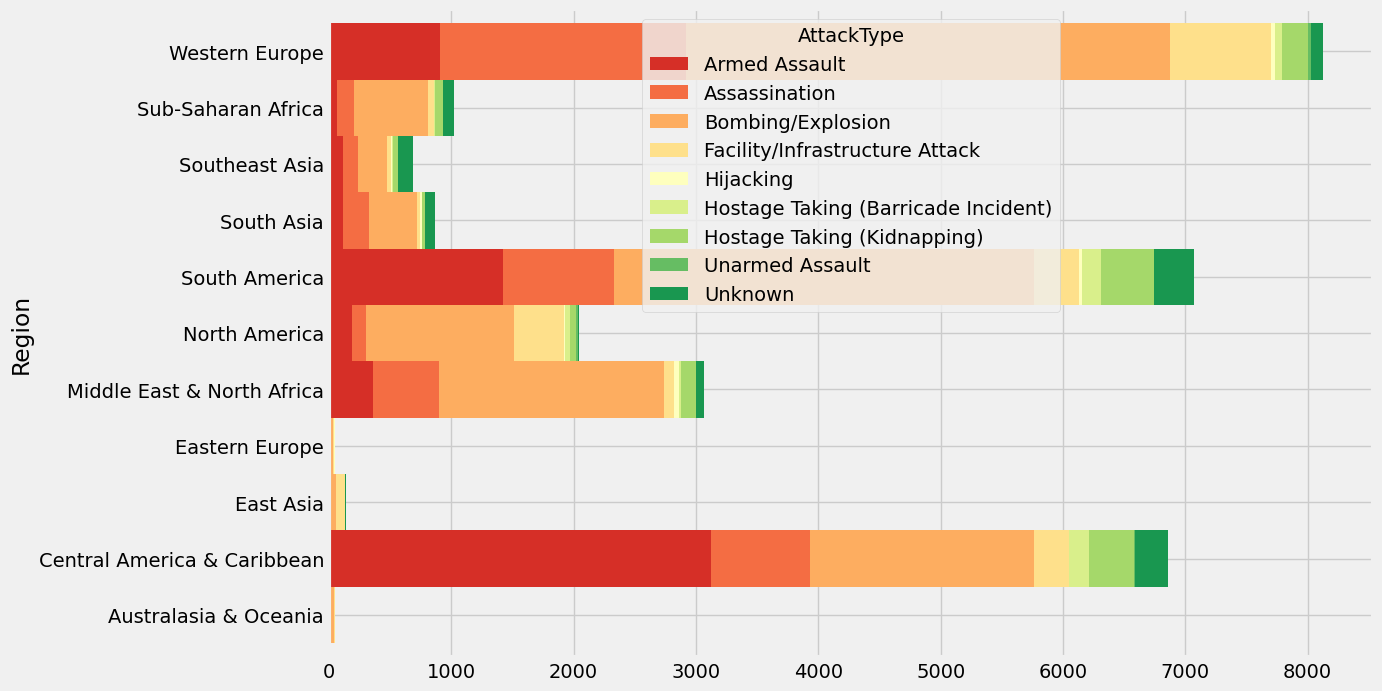

In [23]:
pd.crosstab(terror.Region, terror.AttackType).plot.barh(stacked=True, width=1, color=sns.color_palette('RdYlGn',9))
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

### Terrorism by Country

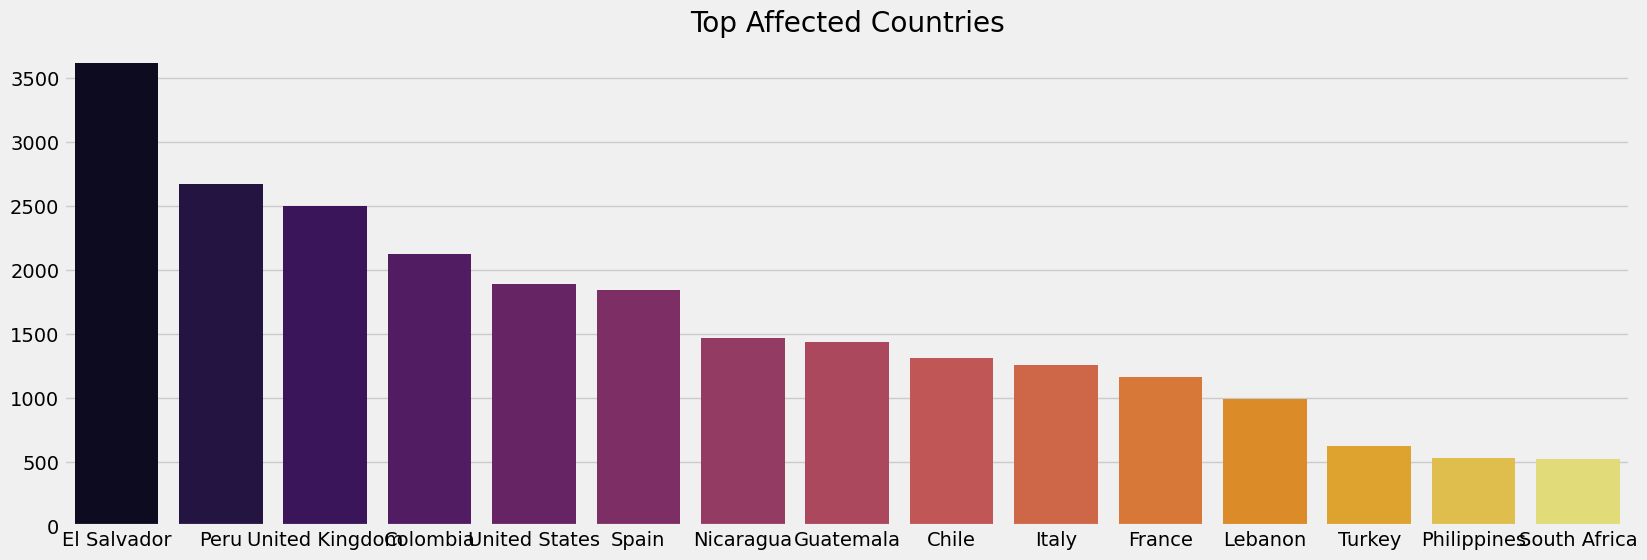

In [26]:
top_countries = terror['Country'].value_counts()[:15]
plt.subplots(figsize=(18,6))
#sns.barplot(terror['Country'].value_counts()[:15].index, terror['Country'].value_counts()[:15].values, palette='inferno')
sns.barplot(x=top_countries.index, y=top_countries.values, palette='inferno')
plt.title("Top Affected Countries")
plt.show()

- **Iraq** has witnessed a very large number of terrorist activities followed by **Pakistan**. One thing to note is the countries with highest attacks, are mostly densely populated countries, thus it will eventually claim many lives. Let's check

### Attacks vs Killed

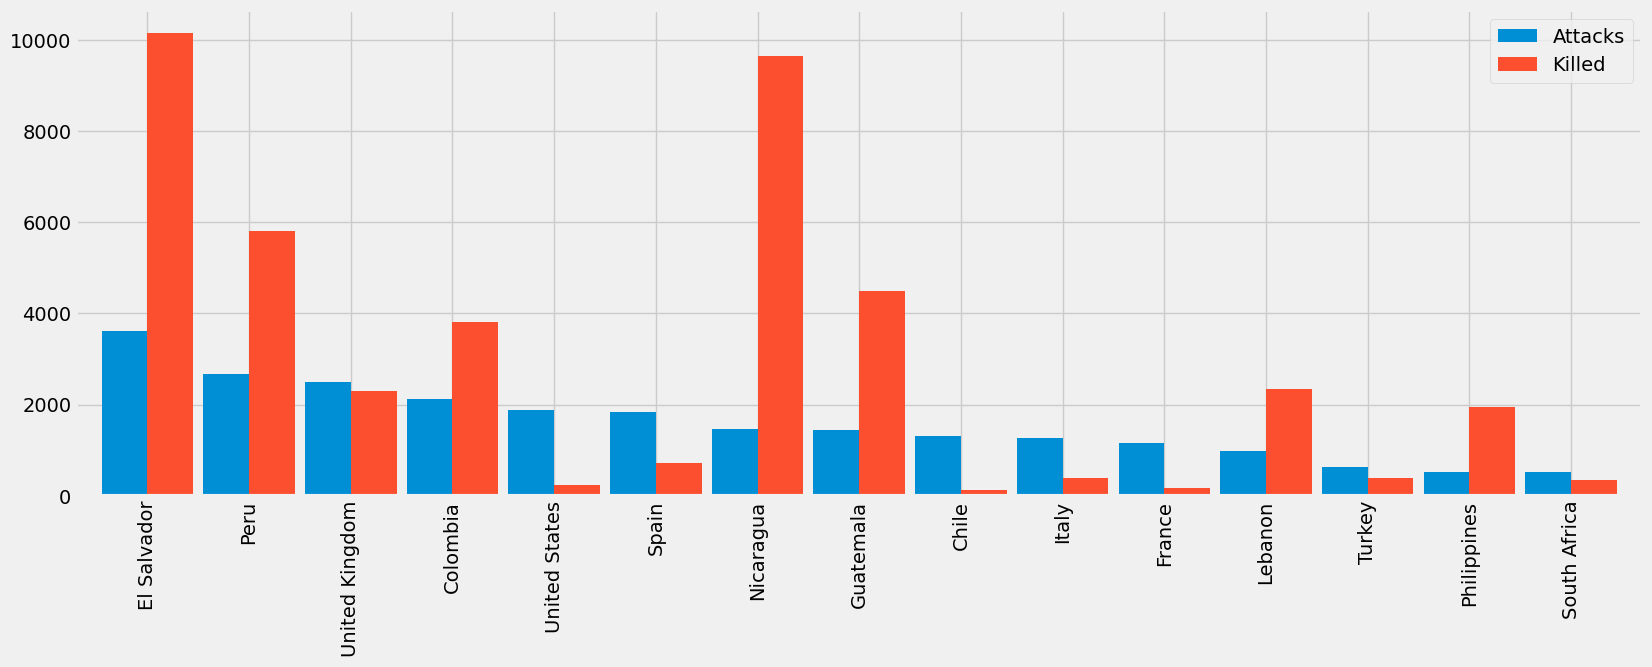

In [27]:
count_terror=terror['Country'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill=terror.groupby('Country')['Killed'].sum().to_frame()
count_terror.merge(count_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

- Look at the killed bar for Iraq. The number of killed is almost 3 folds more than attacks for Iraq. Thus the densely populated theory holds good.

### Activity of Top Terrorist Groups

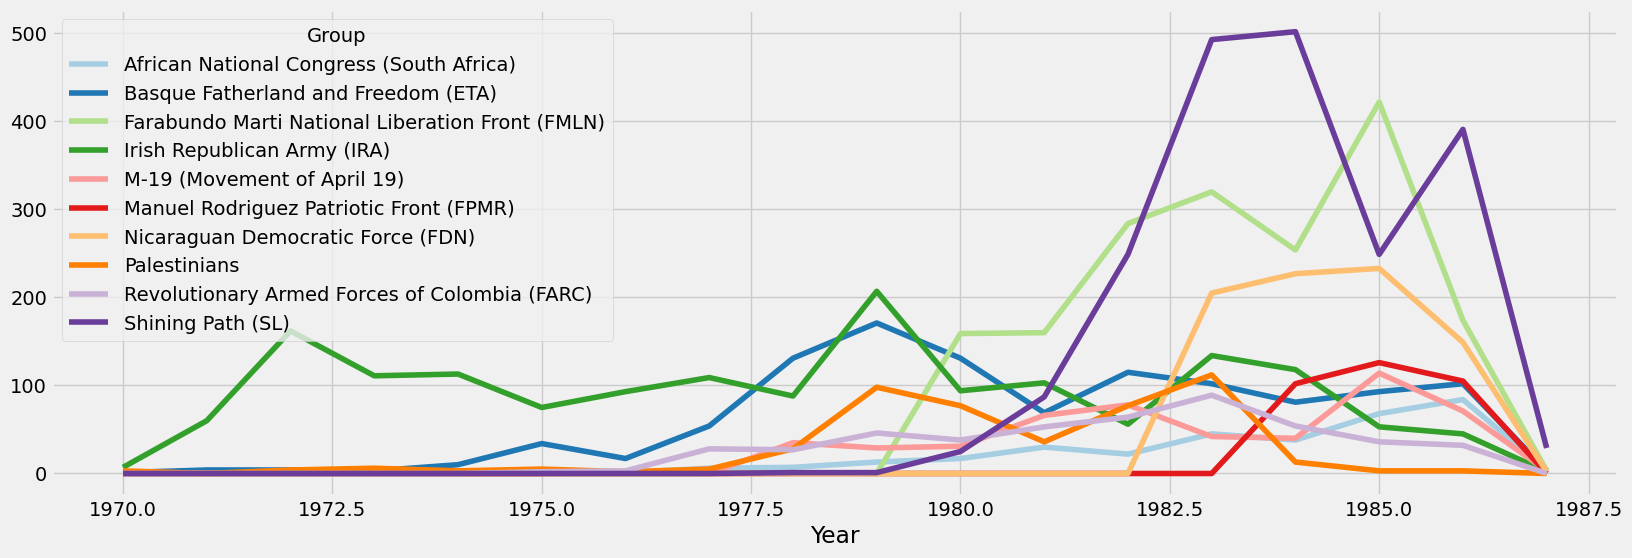

In [29]:
top_group10 = terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_group10.Year, top_group10.Group).plot(color=sns.color_palette('Paired',10))
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# Further advance visuals present in PowerBI Dashboard